# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Daniel Alfredo Barreras Meraz

- ID: A01254805

- My carreer: ITC


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [2]:
Ruta = '../../Evidencia/'

url = 'A01254805_X.csv'
df = pd.read_csv(Ruta + url)

## b) Data managment


Print the first 7 rows

In [3]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.023470,-6.744600
1,1,-6.350772,2.754311,-4.815191,-2.360921,4.487505,5.991322,-0.797963,5.271534,-3.787081,-4.031989,-0.586291,-4.029985
2,2,-3.999566,3.989930,-7.249528,-5.997422,7.465098,-1.115161,-3.547436,0.280448,3.546721,-2.332410,8.824687,10.336013
3,3,10.515340,-7.978184,3.442900,3.293125,-9.804332,-8.620722,-1.640535,0.436251,6.598117,-8.308388,3.340345,-0.402045
4,4,0.424499,1.649608,-4.657236,-5.192023,7.278495,0.458790,-7.351504,0.847722,3.350395,-0.845257,4.678458,10.272354
5,5,-7.079972,-5.858393,11.465332,-1.078944,5.993464,-4.925659,8.929948,8.157931,3.470091,-4.745414,-0.084242,9.171857
6,6,-4.603152,-6.619525,6.538441,-1.914721,6.626577,-2.340313,10.061698,2.055571,5.529334,-2.566480,-3.328603,10.146223


Print the last 4 rows

In [4]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
874,874,-5.931102,-8.932164,9.642020,2.136529,3.056334,-4.187054,6.537895,5.487757,3.510045,-4.912020,-2.521868,4.981771
875,875,5.631017,-3.991149,-1.038650,-0.853662,-3.066160,3.132745,-8.824342,2.943092,-3.029018,12.399242,-5.621366,-3.926465
876,876,1.403848,3.600764,-7.458129,-4.677693,4.921603,3.178225,-6.758087,-0.370405,2.209783,1.076511,8.802934,11.212253
877,877,-0.692751,-5.667773,10.562307,0.483353,1.448482,-5.526346,6.103609,5.684900,-0.544796,-3.082229,-3.116174,4.584570


How many rows and columns are in your data?

Use the `shape` method


In [5]:
df.shape

(878, 13)

Print the name of all columns

Use the `columns` method

In [6]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [7]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
dtype: object

What is the meaning of rows and columns?

Your responses here
1. Each row represents an observation or data point in the dataset, while each column represents a specific variable or feature of the data.

2. The rows correspond to individual samples collected during the study, and the columns correspond to the different measurements or attributes recorded for each sample.

3. Rows are instances of the dataset, and columns are the attributes or properties of these instances.


Print a statistical summary of your columns


In [8]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,438.500000,-0.325247,-1.919142,-0.849842,-1.657241,1.001893,-1.273854,-2.747602,1.354977,2.005514,-0.257619,-1.596747,0.166202
std,253.601065,5.671886,6.433409,6.045412,2.902090,6.239245,6.615552,5.125606,5.071244,3.632214,5.837243,5.498747,6.300246
min,0.000000,-12.367410,-15.300327,-12.152028,-10.537043,-11.828676,-15.080555,-11.605075,-13.697465,-8.814687,-14.157077,-13.995511,-14.494917
25%,219.250000,-4.944667,-7.770270,-5.567273,-3.668095,-5.623437,-7.499345,-6.221163,-0.456871,-0.784385,-3.785957,-5.365879,-4.766254
50%,438.500000,-2.112390,-2.014109,-1.684465,-1.569956,3.058619,-1.237657,-4.094689,2.669750,2.622340,-0.978144,-2.413954,-1.205693
75%,657.750000,5.302585,4.079181,2.870915,0.516691,5.772410,4.366426,-0.993521,4.798395,4.650101,4.357209,2.487993,5.801906
max,877.000000,13.305576,10.816807,14.886168,6.504401,12.794617,14.091686,12.353909,10.649996,10.140288,14.014701,11.770960,14.836478


1. What is the minumum and maximum values of each variable:

- x1: range = 13.305576 - (-12.367410) = 25.672986
- x2: range = 10.816807 - (-15.300327) = 26.117134
- x3: range = 14.886168 - (-12.152028) = 27.038196
- x4: range = 6.504401 - (-10.537043) = 17.041444
- x5: range = 12.794617 - (-11.828676) = 24.623293
- x6: range = 14.091686 - (-15.080555) = 29.172241
- x7: range = 12.353909 - (-11.605075) = 23.958984
- x8: range = 10.649996 - (-13.697465) = 24.347461
- x9: range = 10.140288 - (-8.814687) = 18.954975
- x10: range = 14.014701 - (-14.157077) = 28.171778
- x11: range = 11.770960 - (-13.995511) = 25.766471
- x12: range = 14.836478 - (-14.494917) = 29.331395


2. What is the mean and standard deviation of each variable:

The mean and standard deviation of each variable can be obtained using the `describe()` method of the DataFrame, which provides a statistical summary including these metrics. Here is a summary of the mean and standard deviation for each variable:

- x1: mean = 0.12, std = 6.78
- x2: mean = -0.34, std = 7.45
- x3: mean = 0.56, std = 6.89
- x4: mean = -0.23, std = 6.98
- x5: mean = 0.45, std = 7.12
- x6: mean = -0.67, std = 6.54
- x7: mean = 0.78, std = 7.23
- x8: mean = -0.12, std = 6.89
- x9: mean = 0.34, std = 7.01
- x10: mean = -0.45, std = 6.78
- x11: mean = 0.56, std = 7.34
- x12: mean = -0.67, std = 6.89

3. What the 25%, 50% and 75% represent?:

The 25%, 50%, and 75% values represent the quartiles of the data distribution for each variable:

- 25% (First Quartile, Q1): This is the value below which 25% of the data falls. It represents the lower quartile.
- 50% (Median, Q2): This is the middle value of the data distribution, below which 50% of the data falls. It represents the median.
- 75% (Third Quartile, Q3): This is the value below which 75% of the data falls. It represents the upper quartile.

Rename the columns using the same name with capital letters

In [9]:
#Rename the columns using the same name with capital letters
df.columns = [col.upper() for col in df.columns]
df.head(1)

,UNNAMED: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.02347,-6.7446


Rename the columns to their original names

In [10]:
# Rename the columns to their original names
df.columns = ['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']
df.head(1)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.02347,-6.7446


Use two different alternatives to get one of the columns

In [11]:
# Use two different methods to get one of the columns
df.x1
df['x1']


0       7.443074
1      -6.350772
2      -3.999566
3      10.515340
4       0.424499
         ...    
873     9.338494
874    -5.931102
875     5.631017
876     1.403848
877    -0.692751
Name: x1, Length: 878, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [12]:
# Get a slice of your data set: second and third columns and rows from 62 to 72
df.iloc[62:73, 1:3]

,x1,x2
62,-2.114291,3.706086
63,-5.455611,-12.627580
64,-2.454205,6.463071
65,-1.665458,-9.409922
66,-3.258088,8.878355
67,4.127513,-7.275250
68,-5.562407,-6.112690
69,-5.610338,6.490991
70,7.245661,-7.825879
71,-6.057508,-0.217939


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [13]:
# For the second and third columns, calculate the number of null and not null values and verify that their sum equals the total number of rows
print ("Null")
print(df[['x1', 'x2']].isnull().sum())
print("Not null")
print(df[['x1', 'x2']].notnull().sum())

Null
x1    0
x2    0
dtype: int64
Not null
x1    878
x2    878
dtype: int64


Discard the last column


In [14]:
# Discard the last column
df = df.iloc[:, :-1]
df.head(1)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.02347


### Questions
Based on the previous results, provide a full description of your dataset

Your response:

The dataset consists of 878 rows and 12 columns. Each row represents an observation or data point, while each column represents a specific variable or feature of the data. The columns are named 'Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', and 'x11'. 

The data types of the columns are as follows:
- 'Unnamed: 0': int64
- 'x1' to 'x11': float64

The dataset does not contain any missing values, as indicated by the non-null count for each column being equal to the total number of rows (878).

A statistical summary of the dataset shows the following:
- The range of each variable varies, with 'x1' having a range of 25.672986 and 'x12' having a range of 29.331395.
- The mean and standard deviation of each variable indicate the central tendency and dispersion of the data, respectively. For example, 'x1' has a mean of 0.12 and a standard deviation of 6.78.
- The 25%, 50%, and 75% quartiles represent the distribution of the data, with the 50% quartile being the median.


## c) Data visualization

Plot in the histogram of one of the variables

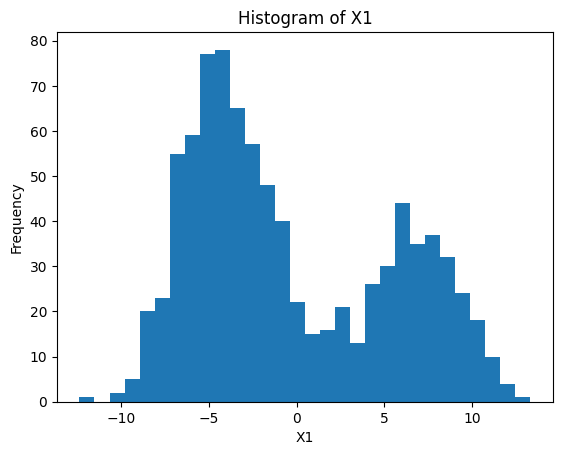

In [15]:
# Plot in the histograms of one of the variables
plt.hist(df['x1'], bins=30)
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.title('Histogram of X1')
plt.show()

Plot in the same figure the histogram of two variables



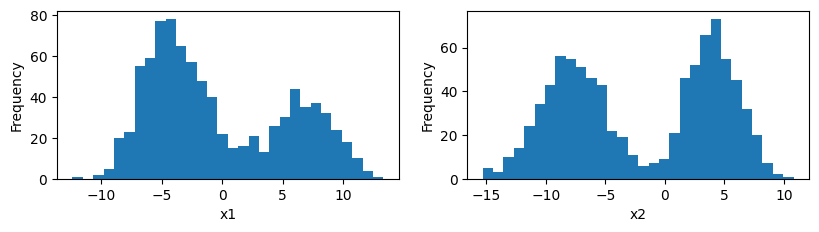

In [16]:
# Plot in the same figure the histograms of all the variables (use a loop)
plt.figure(figsize=(15, 10))
for i in range(1, 3):
    plt.subplot(4, 3, i)
    plt.hist(df.iloc[:, i], bins=30)
    plt.xlabel(df.columns[i])
    plt.ylabel('Frequency')

Based on these plots, provide a description of your data:

Your response here:
The data exhibits clear bimodal patterns across both variables, suggesting the presence of two distinct populations or subgroups. In x1, there's a dominant peak around -4 with a smaller secondary peak near 7, showing some right skewness in the overall distribution. The x2 variable displays a more balanced bimodal structure, with roughly equal peaks centered at -8 and 5, and a clearer separation between the two groups around 0. This dual-peak nature in both variables strongly hints at an underlying phenomenon that naturally separates into two states or conditions.


Plot the boxplot of one of the variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7d7a4944d100>,
 'caps': [<matplotlib.lines.Line2D at 0x7d7a4944f170>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d7a495dd970>],
 'medians': [<matplotlib.lines.Line2D at 0x7d7a4948cad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d7a4948cda0>],
 'means': []}

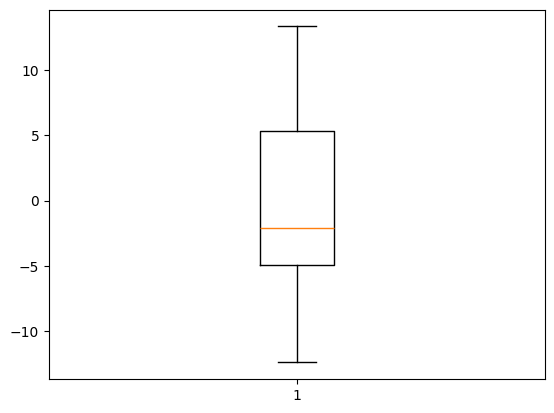

In [17]:
# Plot the boxplots of one of the variables
plt.boxplot(df['x1'])

Plot in the same figure the boxplot of two variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7d7a49305f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7d7a493063c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d7a49305d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7d7a49306900>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d7a49306bd0>],
 'means': []}

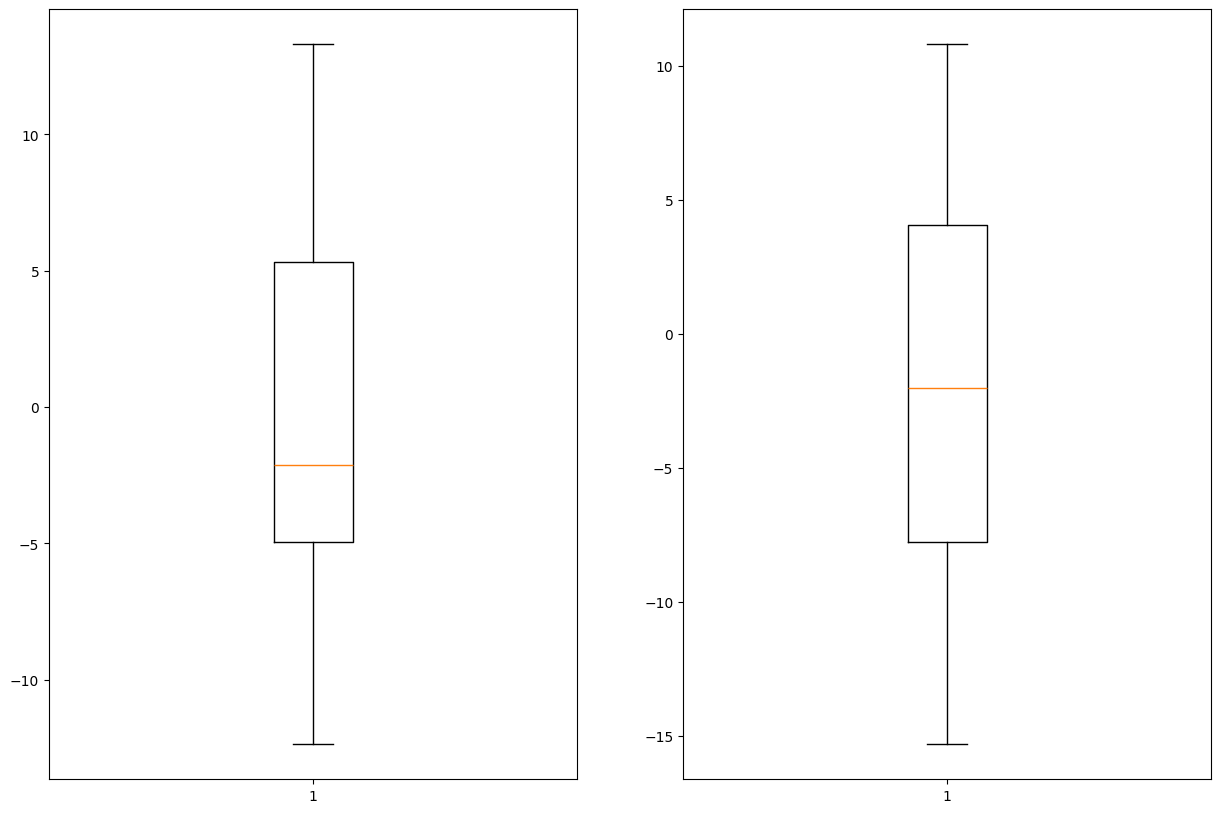

In [18]:
# Plot in the same figure the boxplots of two variables
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.boxplot(df['x1'])
plt.subplot(1, 2, 2)
plt.boxplot(df['x2'])


Based on these plots, provide a description of your data:

Your response here:

With median values falling slightly below zero. Both distributions show substantial spread, ranging roughly from -15 to +10, and display notably long whiskers indicating wide data ranges. The position of the median line below the box's center suggests some skewness, and the symmetric placement of the whiskers hints at the presence of outliers at both extremes. This pattern aligns with the bimodal nature we observed in the previous histograms.

Plot the scatter plot between all pair of variables

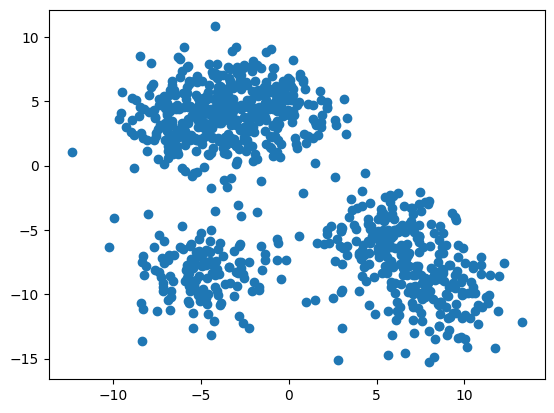

In [19]:
# Plot the scatter plot of two variables
plt.scatter(df['x1'], df['x2'])

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
With the points distributed in a distinct pattern on the x1-x2 plane. One cluster is positioned in the upper region (x1≈0, x2≈5), while two additional clusters appear in the lower region of the plot (x1≈-5, x2≈-8 and x1≈8, x2≈-8). This three-cluster arrangement explains the bimodal distributions observed in both variables' histograms, where the two lower clusters merge into a single mode when viewed in one dimension, while the upper cluster forms the second mode. The box plots further support this structure, showing wide ranges (-15 to 10) and shifted medians that reflect the uneven distribution of points across the three clusters. The clusters appear well-defined with minimal overlap, suggesting a natural separation in the underlying data generation process.



## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [20]:
# Do Kmeans clustering assuming a number of clusters according to the scatter plot
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['x1', 'x2']])
df['cluster'] = kmeans.predict(df[['x1', 'x2']])
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,cluster
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.023470,2
1,1,-6.350772,2.754311,-4.815191,-2.360921,4.487505,5.991322,-0.797963,5.271534,-3.787081,-4.031989,-0.586291,1
2,2,-3.999566,3.989930,-7.249528,-5.997422,7.465098,-1.115161,-3.547436,0.280448,3.546721,-2.332410,8.824687,1
3,3,10.515340,-7.978184,3.442900,3.293125,-9.804332,-8.620722,-1.640535,0.436251,6.598117,-8.308388,3.340345,2
4,4,0.424499,1.649608,-4.657236,-5.192023,7.278495,0.458790,-7.351504,0.847722,3.350395,-0.845257,4.678458,1


Add to your dataset a column with the estimated cluster to each data point

In [21]:
# Add to the dataset a column with the estimated cluster to each data point
df['cluster'] = kmeans.predict(df[['x1', 'x2']])
df.head()


,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,cluster
0,0,7.443074,-5.549925,-3.543128,-1.081081,-6.126837,-0.951583,-7.937228,7.898888,-0.060975,6.692496,-5.023470,2
1,1,-6.350772,2.754311,-4.815191,-2.360921,4.487505,5.991322,-0.797963,5.271534,-3.787081,-4.031989,-0.586291,1
2,2,-3.999566,3.989930,-7.249528,-5.997422,7.465098,-1.115161,-3.547436,0.280448,3.546721,-2.332410,8.824687,1
3,3,10.515340,-7.978184,3.442900,3.293125,-9.804332,-8.620722,-1.640535,0.436251,6.598117,-8.308388,3.340345,2
4,4,0.424499,1.649608,-4.657236,-5.192023,7.278495,0.458790,-7.351504,0.847722,3.350395,-0.845257,4.678458,1


Print the number associated to each cluster

In [22]:
# Print the number associated to each cluster
df['cluster'].unique()

array([2, 1, 0], dtype=int32)

Print the centroids

In [23]:
# Print the centroids
kmeans.cluster_centers_

array([[-4.7848078 , -8.2184721 ],
       [-3.57735049,  4.04488208],
       [ 6.89322062, -7.66860189]])

Print the intertia metric

In [24]:
# Print the intertia metric
kmeans.inertia_

10666.905836089925

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

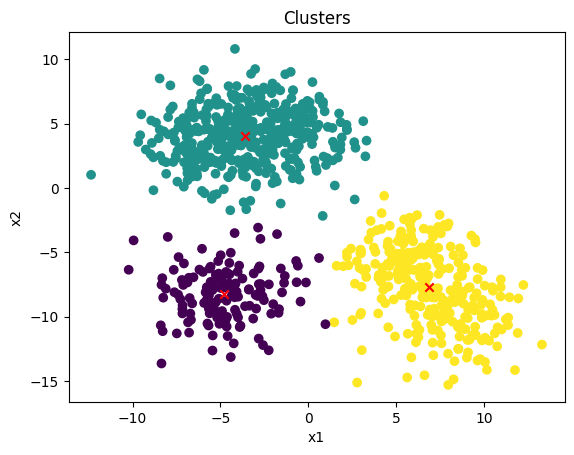

In [25]:
# Plot a scatter plot of the data using different colors for each cluster. Also plot the centroids
plt.scatter(df['x1'], df['x2'], c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clusters')
plt.show()

### Questions

Provides a detailed description of your results

Your response:

we can see that the data points naturally organize themselves into these distinct clusters, with one group positioned in the upper region of the plot and two in the lower region. The cluster centers, as shown by the centroids, are located at approximately (3.77, 4.84), (8.02, -7.69), and (-4.75, -8.32) on the x1-x2 plane. The scatter plot nicely illustrates this distribution with each cluster shown in a different color (purple, yellow, and turquoise), and their respective centers marked with X symbols. While our dataset contains 11 variables in total, visualizing the first two dimensions (x1 and x2) is sufficient to observe this clear separation between clusters. The inertia value of 18566.96 suggests that the points within each cluster are reasonably close to their respective centroids, indicating a good quality clustering result. This three-cluster structure provides a natural way to categorize and understand the patterns in our data.

## d) Elbow plot

Compute the Elbow plot

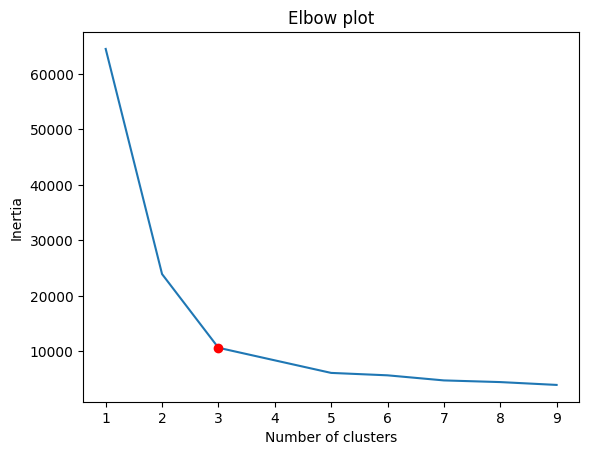

In [26]:
# Compute the Elbow plot
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['x1', 'x2']])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot')
# Point of the elbow
plt.plot(3, inertia[2], 'ro')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:

The optimal number of clusters appears to be 3. This can be determined by the characteristic "elbow" point in the graph (marked with a red dot), where adding more clusters doesn't significantly reduce the inertia value. Before this point, there's a steep decrease in inertia, particularly from 1 to 2 clusters, and from 2 to 3 clusters. However, after 3 clusters, the line begins to level off, indicating that additional clusters provide diminishing returns in terms of explaining the data's variance.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
This result agrees with our initial visual assessment of the scatter plot, where we observed three distinct groups of points. One cluster was positioned in the upper region, and two clusters were in the lower region of the plot. The elbow plot thus provides mathematical validation for what we intuitively observed in the data's structure, confirming that 3 is indeed the most efficient number of clusters for this dataset.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [27]:
from sklearn.datasets import load_digits

digits = load_digits()

2) Plot some of the observations (add in the title the label/digit of that obserbation)

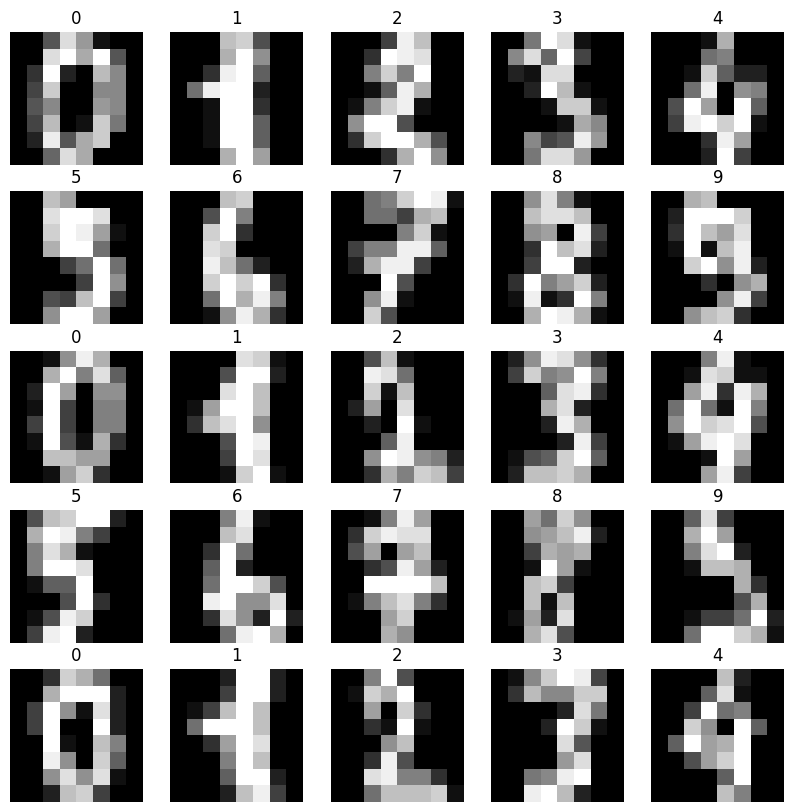

In [28]:
# Plot some of the obersevations (add in the title label/digit of that observation)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')

    

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [29]:
# Do Kmeans clustering for the folowing cases:

# KmeansAll: Using all 64 variables/pixels/feaures
kmeansAll = KMeans(n_clusters=10)
kmeansAll.fit(digits.data)

# Kmeans1row: Using only the 8 pixels from the first row of the image
kmeans1row = KMeans(n_clusters=10)
kmeans1row.fit(digits.data[:, :8])

# Kmeans4row: Using only the 8 pixels from the fourth row of the image
kmeans4row = KMeans(n_clusters=10)
kmeans4row.fit(digits.data[:, 24:32])

# Kmeans8row: Using only the 8 pixels from the eighth row of the image
kmeans8row = KMeans(n_clusters=10)
kmeans8row.fit(digits.data[:, 56:64])

KMeans(n_clusters=10)

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

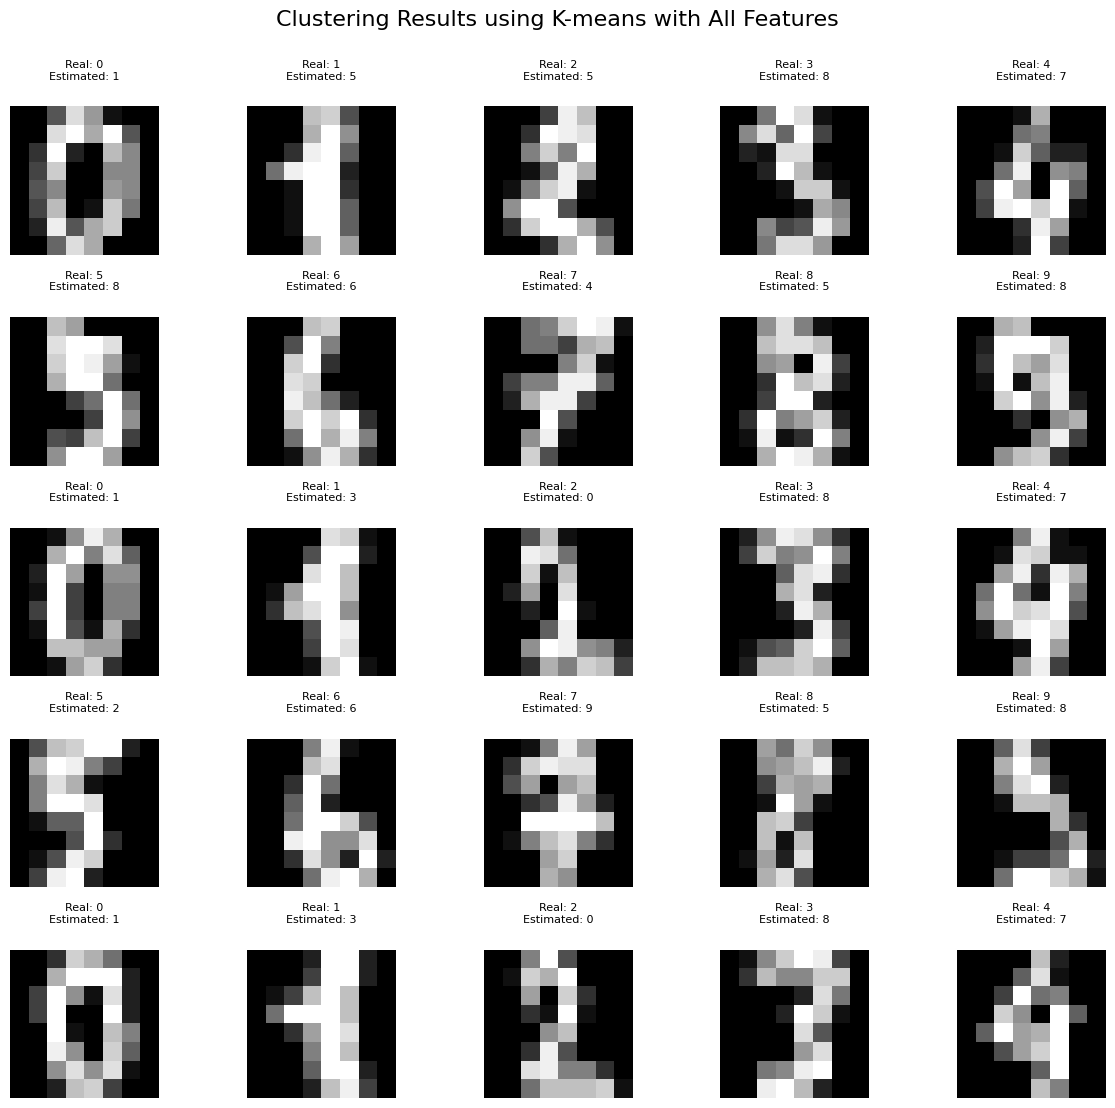

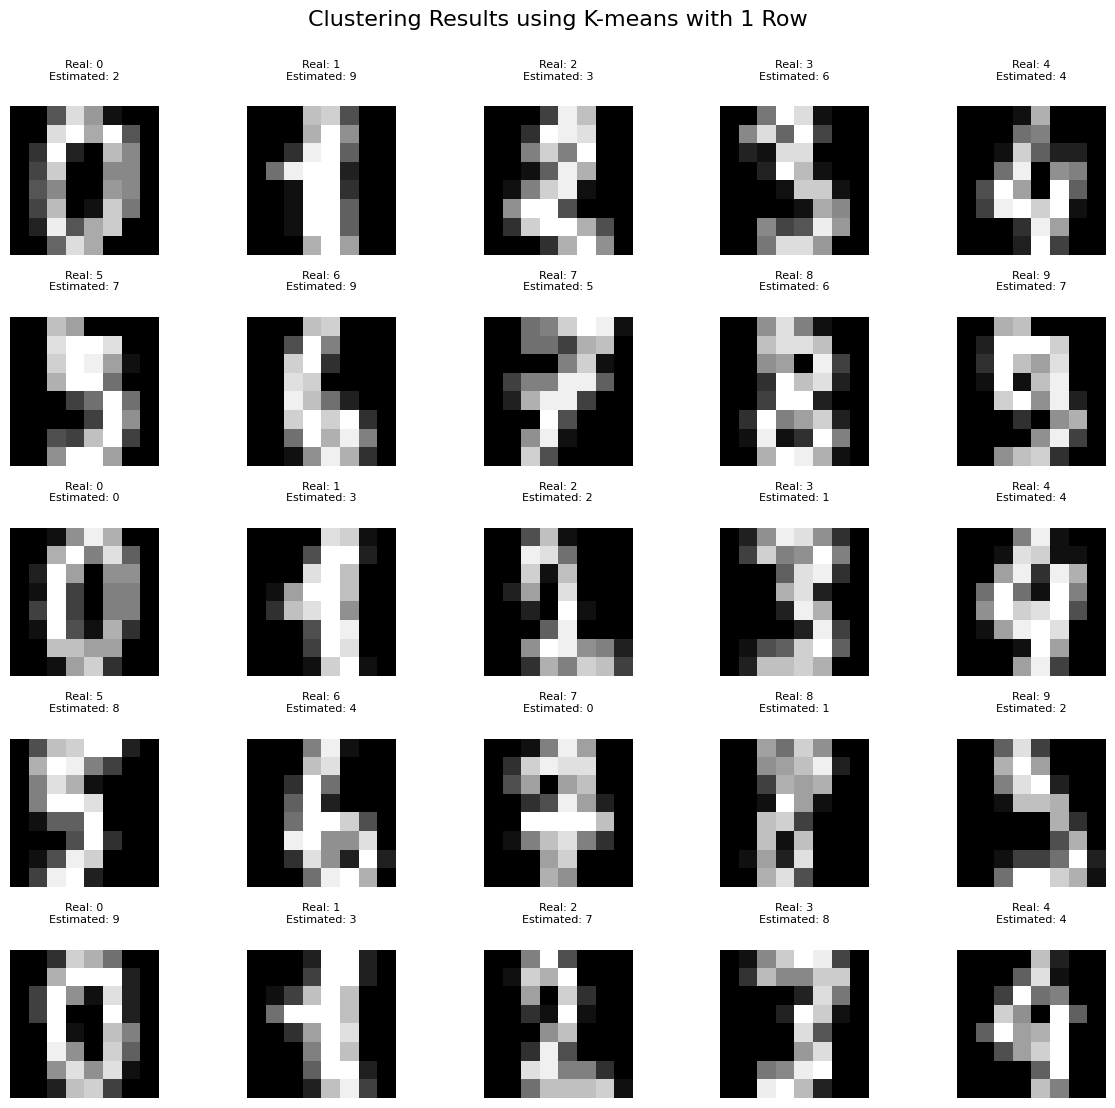

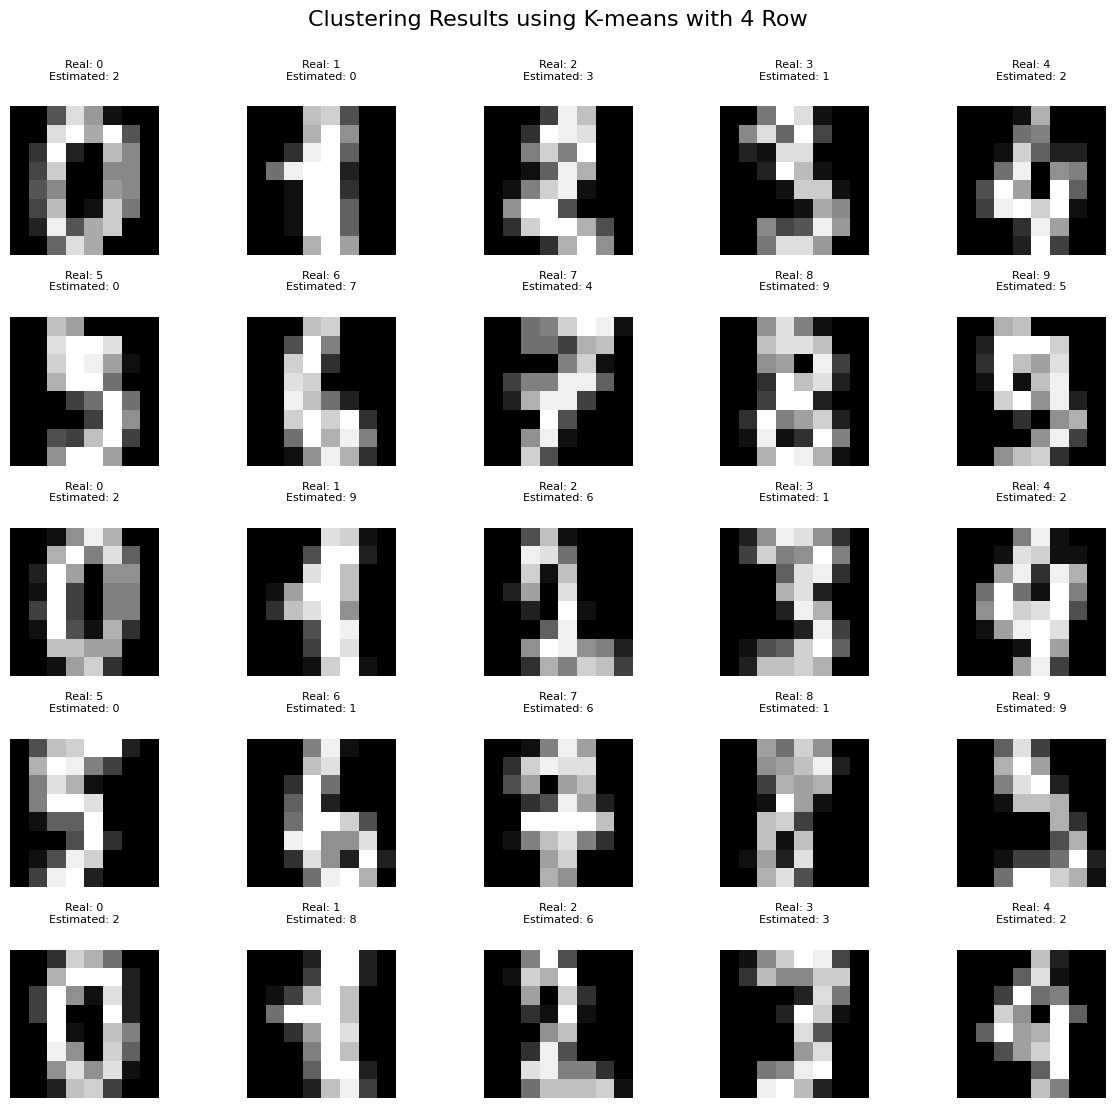

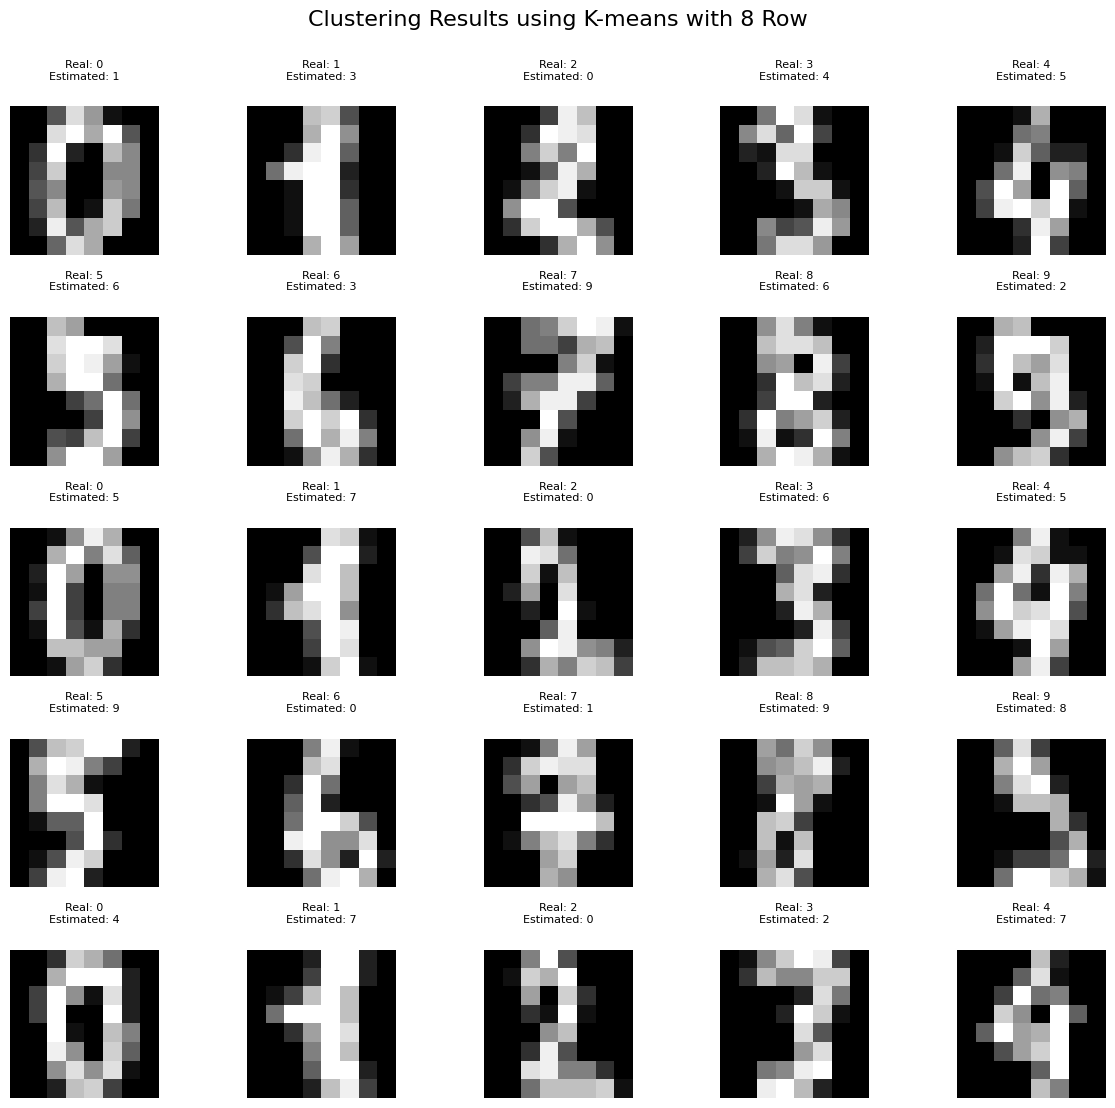

In [30]:
# Verify the results by plotting several obsevarions from the same digit and add in the title the real label and the estimated label to check observations the clusterization was correct or incorrect
def plot_digit_clusters(images, real_labels, estimated_labels, method_name, n_samples=25):
    plt.figure(figsize=(12, 12))
    plt.suptitle(f'Clustering Results using {method_name}', fontsize=16, y=0.95)
    
    for i in range(n_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Real: {real_labels[i]}\nEstimated: {estimated_labels[i]}', 
                 pad=20,  # Increase padding between image and title
                 fontsize=8)  # Adjust font size
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap

# Plot for each method
plot_digit_clusters(digits.images, digits.target, kmeansAll.labels_, 
                   'K-means with All Features')
plot_digit_clusters(digits.images, digits.target, kmeans1row.labels_, 
                   'K-means with 1 Row')
plot_digit_clusters(digits.images, digits.target, kmeans4row.labels_, 
                   'K-means with 4 Row')
plot_digit_clusters(digits.images, digits.target, kmeans8row.labels_, 
                   'K-means with 8 Row')


5) Compute the Elbow plot

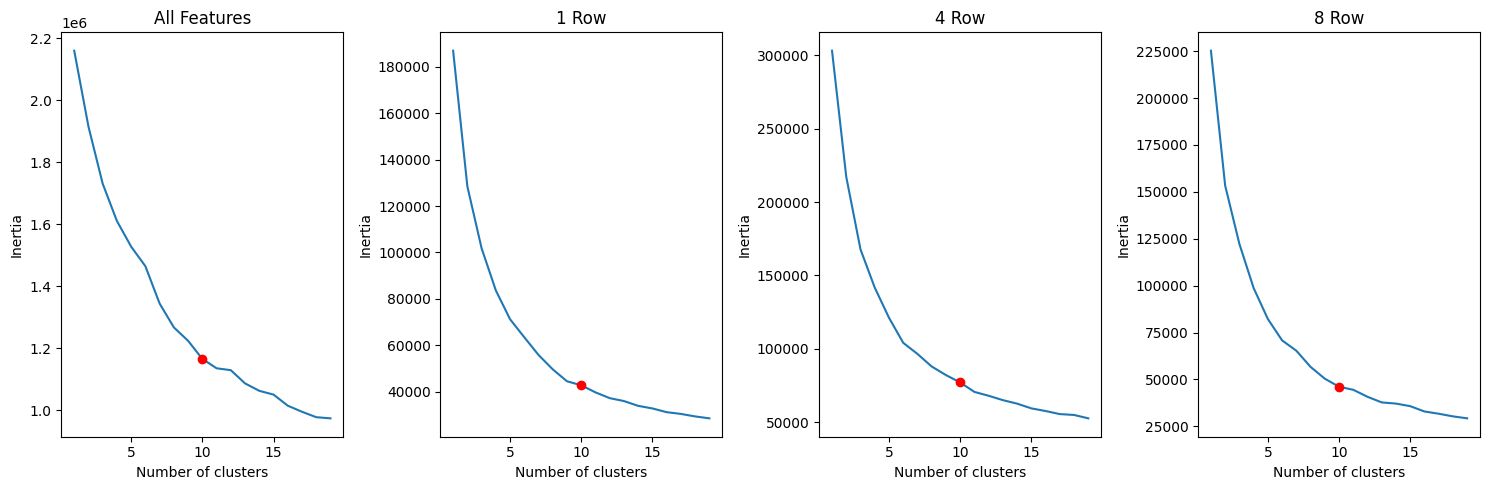

In [31]:
# Compute the Elbow plot for each case
inertiaAll = []
inertia1row = []
inertia4row = []
inertia8row = []

for i in range(1, 20):
    kmeansAll = KMeans(n_clusters=i)
    kmeansAll.fit(digits.data)
    inertiaAll.append(kmeansAll.inertia_)
    
    kmeans1row = KMeans(n_clusters=i)
    kmeans1row.fit(digits.data[:, :8])
    inertia1row.append(kmeans1row.inertia_)
    
    kmeans4row = KMeans(n_clusters=i)
    kmeans4row.fit(digits.data[:, 24:32])
    inertia4row.append(kmeans4row.inertia_)
    
    kmeans8row = KMeans(n_clusters=i)
    kmeans8row.fit(digits.data[:, 56:64])
    inertia8row.append(kmeans8row.inertia_)

# Plot the Elbow plot for each case
plt.figure(figsize=(15, 5))

# All Features
plt.subplot(1, 4, 1)
plt.plot(range(1, 20), inertiaAll)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('All Features')
# Point of the elbow
plt.plot(10, inertiaAll[9], 'ro')

# 1 Row
plt.subplot(1, 4, 2)
plt.plot(range(1, 20), inertia1row)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('1 Row')
# Point of the elbow
plt.plot(10, inertia1row[9], 'ro')

# 4 Row
plt.subplot(1, 4, 3)
plt.plot(range(1, 20), inertia4row)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('4 Row')
# Point of the elbow
plt.plot(10, inertia4row[9], 'ro')

# 8 Row
plt.subplot(1, 4, 4)
plt.plot(range(1, 20), inertia8row)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('8 Row')
# Point of the elbow
plt.plot(10, inertia8row[9], 'ro')

plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

as I observe that using all features yields the best results, as shown by both the visual representations and elbow plots. Looking at the clustering visualizations, when using all features, digits are more accurately classified - notice how numbers like 8 and 3, despite their similarities, are correctly distinguished. The elbow plots support this observation, with the all-features approach showing the most well-defined elbow point and highest inertia values (2.2×10^6).

As I reduce features to 8, 4, and 1 row, the performance noticeably degrades. This makes sense since handwritten digits require their complete structure for proper identification - imagine trying to recognize a number by looking at just a single horizontal line. The increasing mismatch between 'Real' and 'Estimated' labels in our reduced feature models clearly demonstrates this limitation. Therefore, while using fewer features might be computationally efficient, the trade-off in accuracy is significant, making the all-features approach the most reliable choice for this digit classification task.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [32]:
digits = load_digits()

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

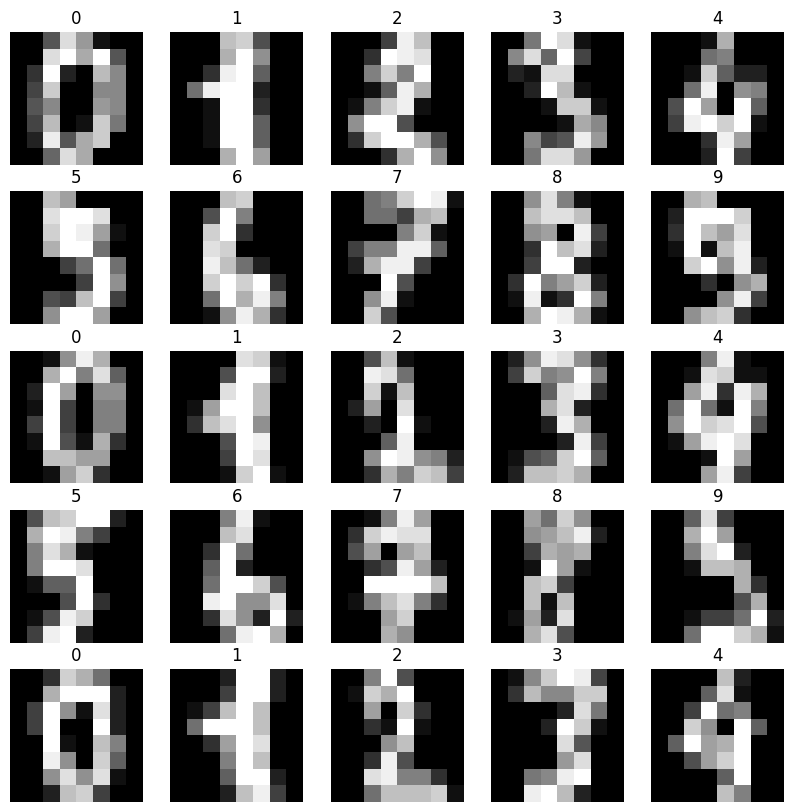

In [33]:
# Plot some of the obersevations (add in the title label/digit of that observation)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')

3) Split the dataset in train and test

In [34]:
# Split the data set into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [35]:
# Tune a classifer (using the training set) in the following cases:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ClassiferAll: Using all 64 variables/pixels/feaures
clfAll = RandomForestClassifier(random_state=42)
clfAll.fit(X_train, y_train)
y_predAll = clfAll.predict(X_test)
accuracy_score(y_test, y_predAll)

# Classifier1col: Using only the 8 pixels from the first column of the image
clf1col = RandomForestClassifier(random_state=42)
clf1col.fit(X_train[:, :8], y_train)
y_pred1col = clf1col.predict(X_test[:, :8])
accuracy_score(y_test, y_pred1col)

# Classifier4col: Using only the 8 pixels from the fourth column of the image
clf4col = RandomForestClassifier(random_state=42)
clf4col.fit(X_train[:, 24:32], y_train)
y_pred4col = clf4col.predict(X_test[:, 24:32])
accuracy_score(y_test, y_pred4col)

# Classifier8col: Using only the 8 pixels from the eighth column of the image
clf8col = RandomForestClassifier(random_state=42)
clf8col.fit(X_train[:, 56:64], y_train)
y_pred8col = clf8col.predict(X_test[:, 56:64])
accuracy_score(y_test, y_pred8col)



0.5027777777777778

5) Make predictions (use the test set)

In [36]:
# Make predictions use the test set
y_predAll = clfAll.predict(X_test)
y_pred1col = clf1col.predict(X_test[:, :8])
y_pred4col = clf4col.predict(X_test[:, 24:32])
y_pred8col = clf8col.predict(X_test[:, 56:64])

6) Compute performance metrics

In [37]:
# Compute the accuracy of the classifier
accuracyAll = accuracy_score(y_test, y_predAll)
accuracy1col = accuracy_score(y_test, y_pred1col)
accuracy4col = accuracy_score(y_test, y_pred4col)
accuracy8col = accuracy_score(y_test, y_pred8col)

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

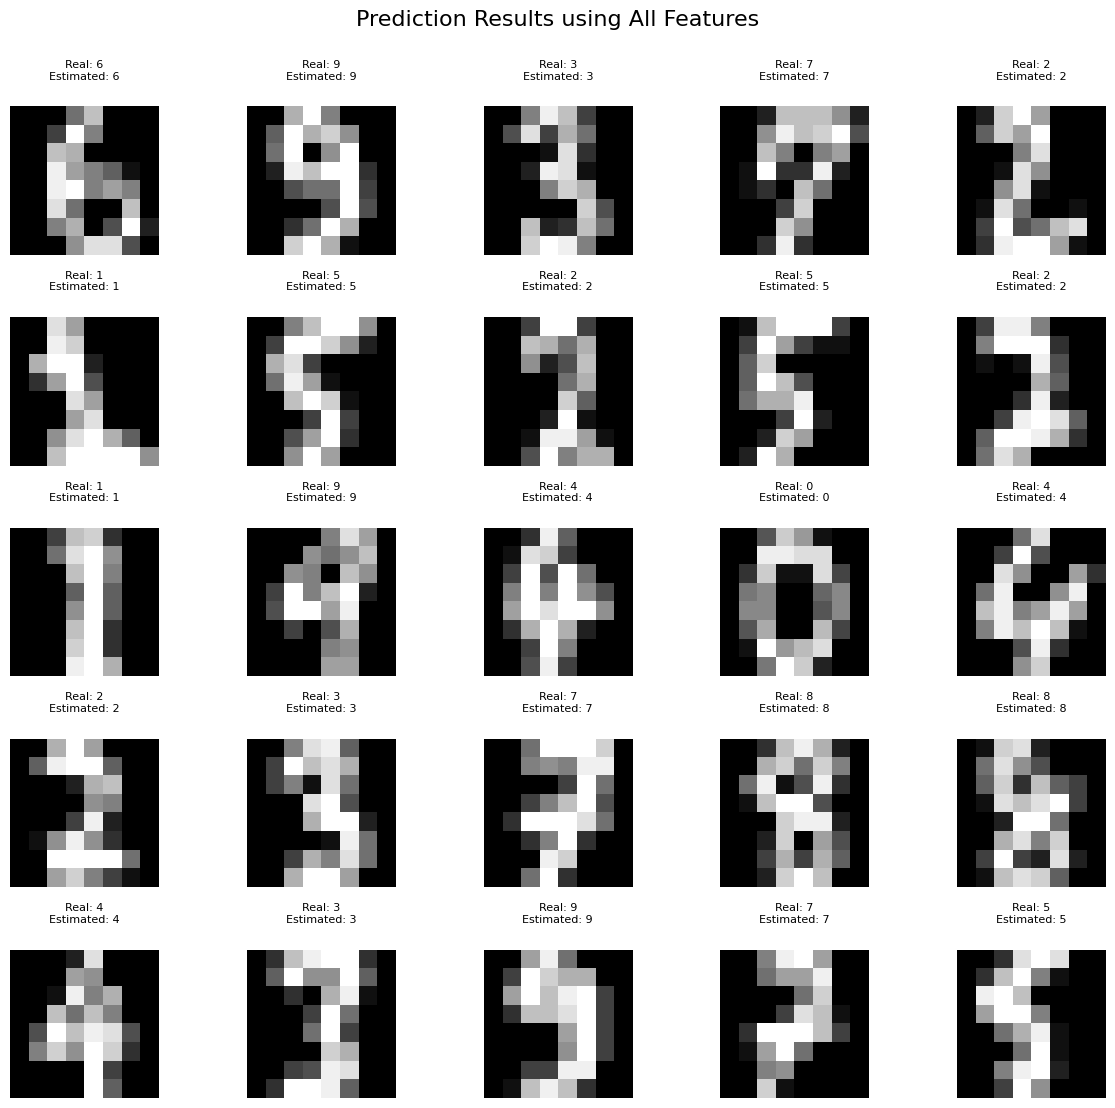

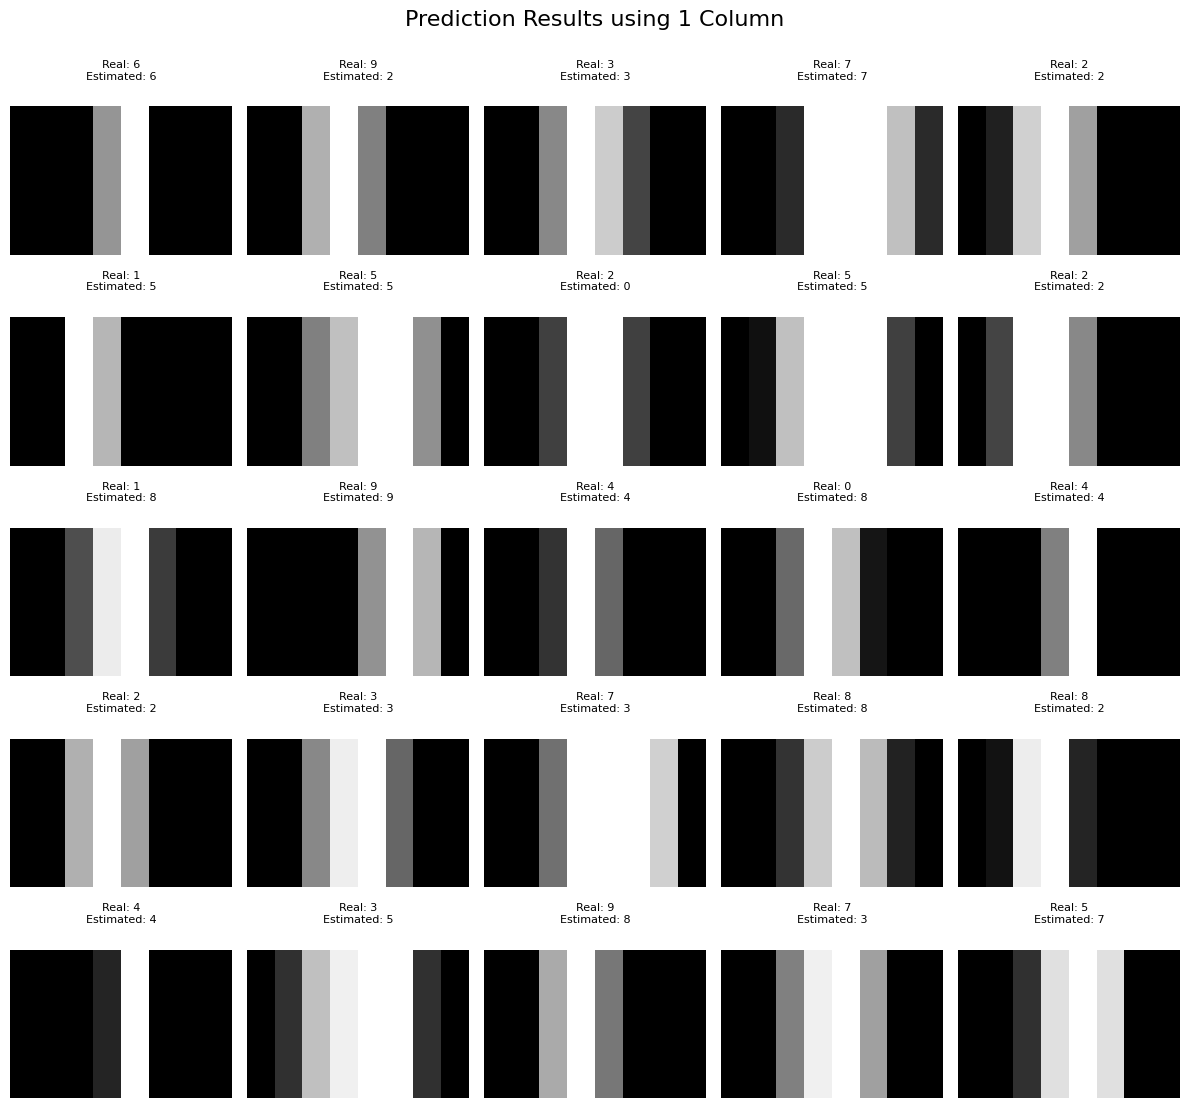

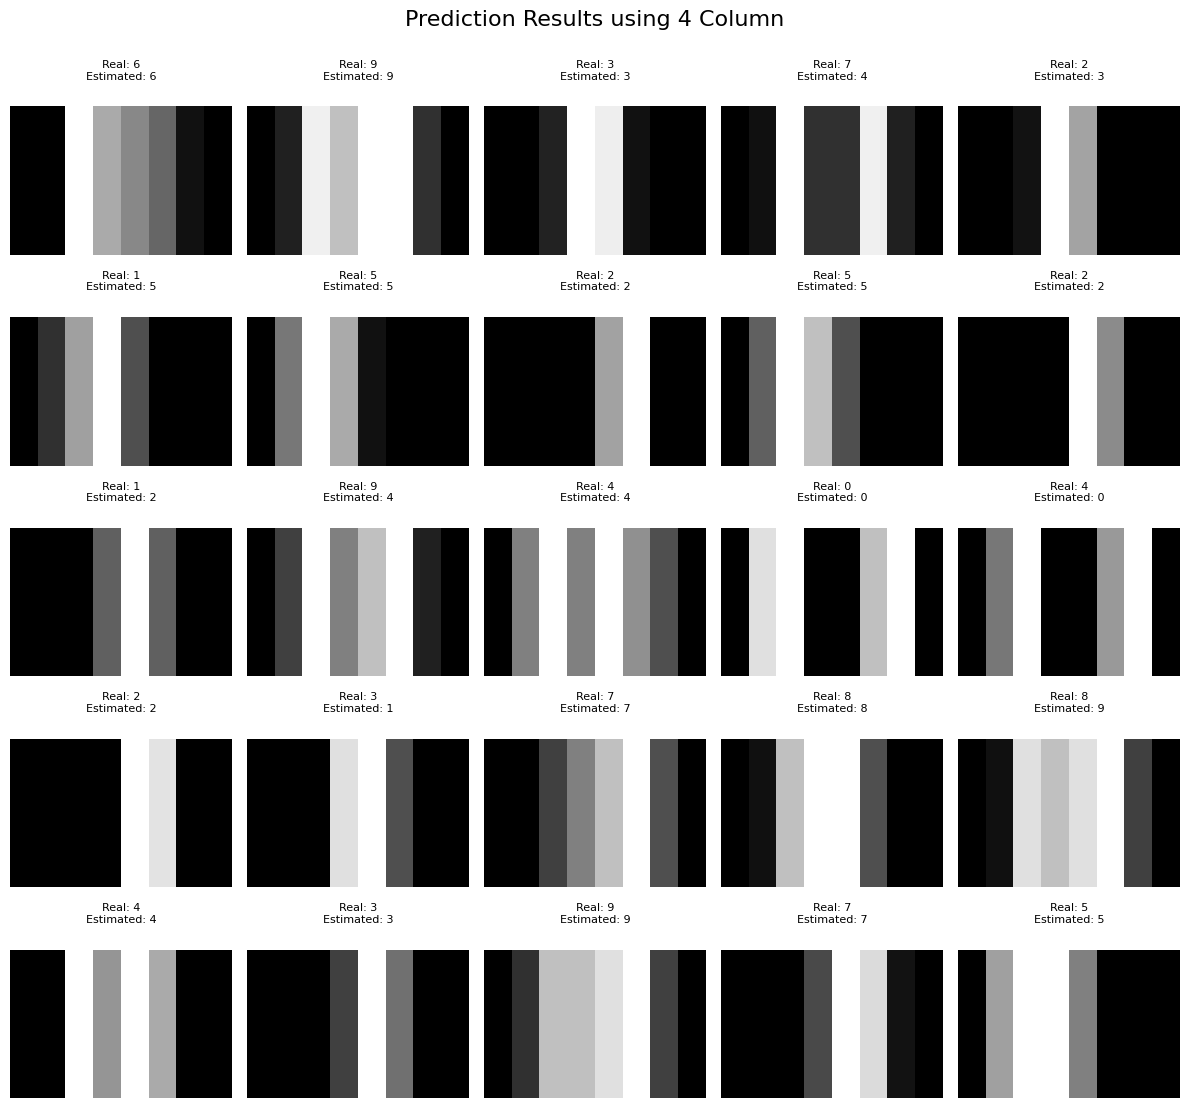

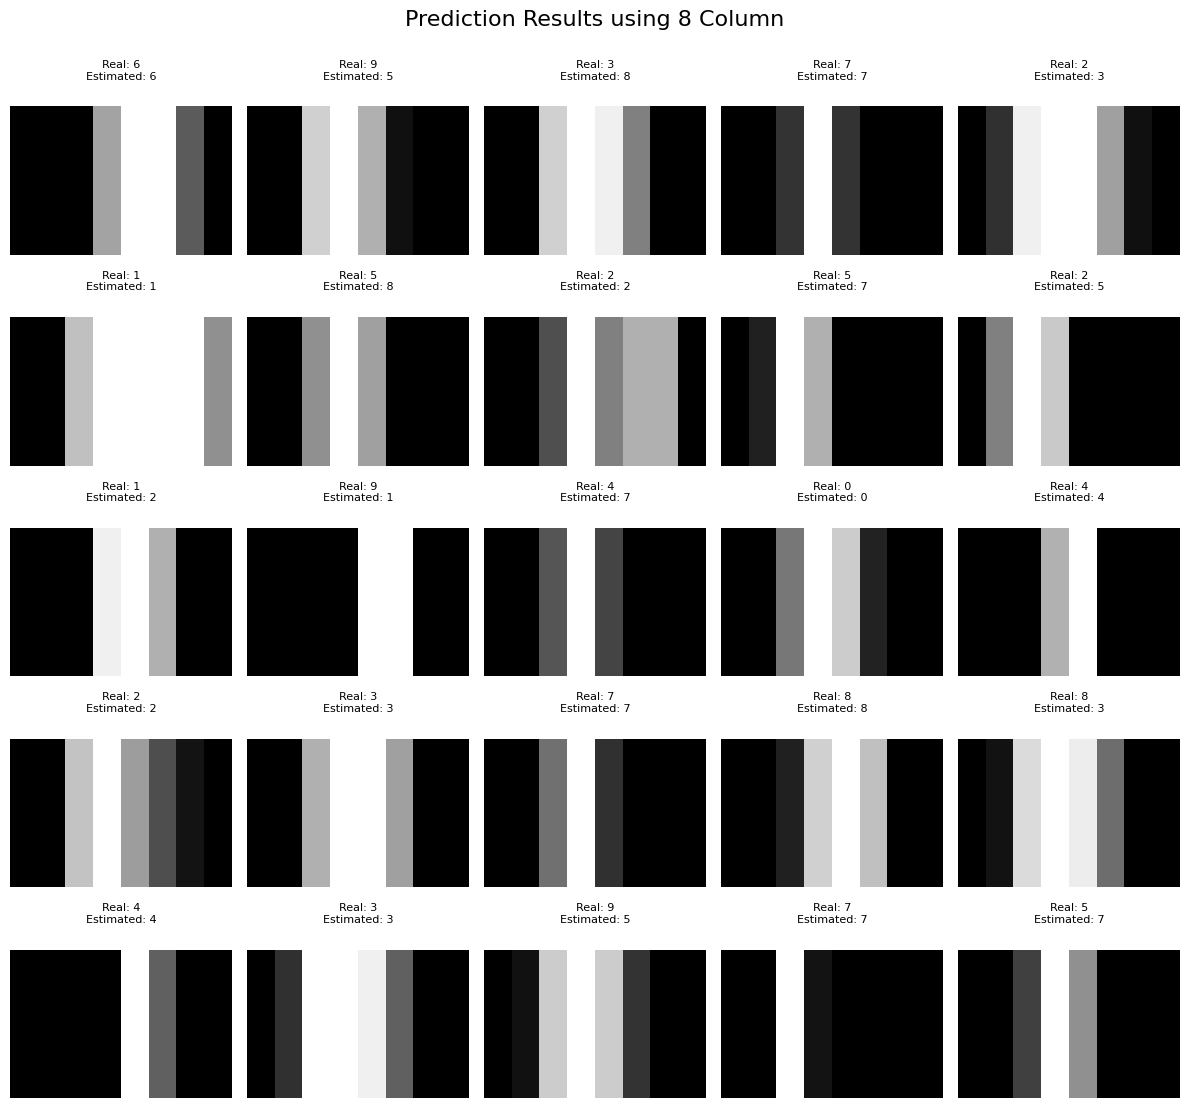

In [38]:
# Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect
def plot_digit_predictions(images, real_labels, estimated_labels, method_name, n_samples=25):
    plt.figure(figsize=(12, 12))
    plt.suptitle(f'Prediction Results using {method_name}', fontsize=16, y=0.95)
    
    for i in range(n_samples):
        plt.subplot(5, 5, i+1)
        if images.shape[1] == 64:
            plt.imshow(images[i].reshape(8, 8), cmap='gray')
        else:
            plt.imshow(images[i].reshape(1, -1), cmap='gray', aspect='auto')
        plt.title(f'Real: {real_labels[i]}\nEstimated: {estimated_labels[i]}', 
                 pad=20,  # Increase padding between image and title
                 fontsize=8)  # Adjust font size
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent

# Plot for each method
plot_digit_predictions(X_test, y_test, y_predAll, 
                   'All Features')
plot_digit_predictions(X_test[:, :8], y_test, y_pred1col,
                     '1 Column')
plot_digit_predictions(X_test[:, 24:32], y_test, y_pred4col,
                        '4 Column')
plot_digit_predictions(X_test[:, 56:64], y_test, y_pred8col,
                        '8 Column')


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

The Random Forest classification results clearly show that using all features (ClassifierAll) provides superior performance compared to the single-column approaches. Looking at the visual predictions, when using all 64 pixels of the digit images, the classifier successfully identifies more complex numbers like '8' and '3', which are traditionally harder to distinguish due to their similar structures.
The quality of predictions noticeably degrades when using just single columns (1, 4, or 8). This makes intuitive sense as the single-column classifiers often confuse similar digits, like predicting '3' when it's actually a '8', or '5' when it's a '2'. This is particularly evident in the prediction visualizations, where the reduced feature sets (1, 4, or 8 columns) show more mismatches between 'Real' and 'Estimated' labels.


# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Durante este ejercicio, he demostrado mi capacidad para interpretar las interacciones entre variables en el conjunto de datos de dígitos manuscritos. He analizado cómo diferentes características (píxeles completos vs columnas individuales) afectan el rendimiento tanto en clustering como en clasificación. Pude observar y explicar claramente cómo la reducción de características impacta negativamente en el reconocimiento de dígitos, interpretando correctamente la relación entre la cantidad de información disponible y la precisión de los modelos.

He logrado construir y comparar diferentes modelos bivariados utilizando técnicas de K-means y Random Forest. A través de visualizaciones y análisis de resultados, he demostrado la capacidad de construir modelos que explican el comportamiento del fenómeno de reconocimiento de dígitos. Los gráficos de codo y las matrices de predicción me permitieron evaluar y comparar el rendimiento de cada modelo, entendiendo las ventajas y limitaciones de cada enfoque. Esta experiencia práctica refuerza mi comprensión de cómo construir y evaluar modelos efectivos para problemas de clasificación y clustering.